In [1]:
import requests
import pandas as pd
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import scipy.stats as ss
import scipy
import datetime
from scipy.stats import norm 
from math import factorial

K = lambda x: norm.pdf(x)

In [12]:
# Import data
df = pd.read_csv('USDC.csv')
df.timestamp = pd.to_datetime(df.timestamp)
r = df.loc[:, ['variable_borrow_rate_comp', 'timestamp']]
r = r.loc[~np.isnan(r.variable_borrow_rate_comp),:]

# Linear interpolation
from scipy.interpolate import interp1d
y = r.copy().loc[:,'variable_borrow_rate_comp']
x = r.copy().loc[:,'timestamp']
x = [int(tt.strftime('%s')) for tt in x ]

In [13]:
t0 = '20200601'
T  = '20220306'
second_in_year = 60*60*24*365
second_in_hour = 60*60
t0 = int(pd.to_datetime(t0).strftime('%s'))
T = int(pd.to_datetime(T).strftime('%s'))
n = int((T-t0)/second_in_hour)
t_grid = np.linspace(t0,T,n+1)
dt = t_grid[1]-t_grid[0]
dt/=second_in_year
f = interp1d(x, y)
y_hat = f(t_grid)

0.00011415525114155251

In [14]:
data = pd.DataFrame({'t':t_grid, 'r':y_hat})
skip = 24
data = data.rolling(skip).mean() 
data = data.iloc[::skip, :].reset_index(drop=True)
data = data.loc[1:,:]
data.loc[:, 'datetime'] = data.t.apply(lambda x: datetime.datetime.fromtimestamp(x))

In [16]:
IM = dict()

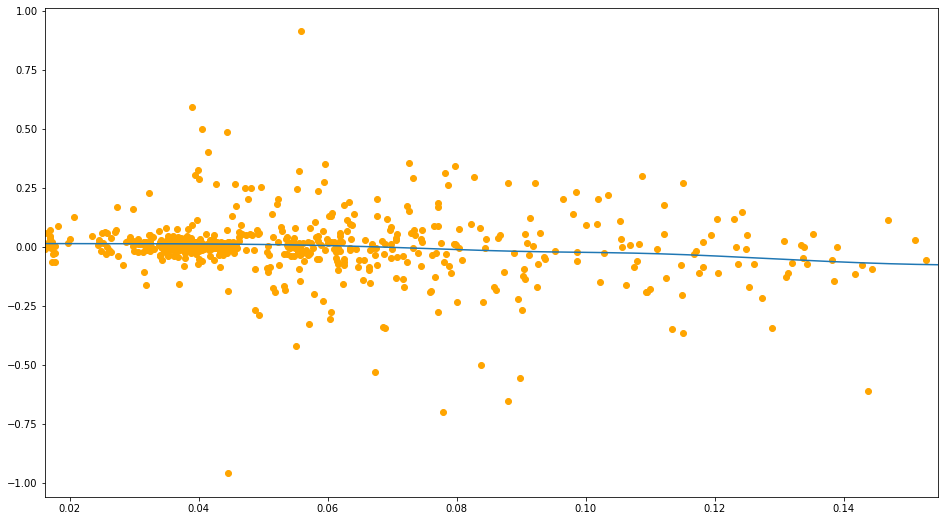

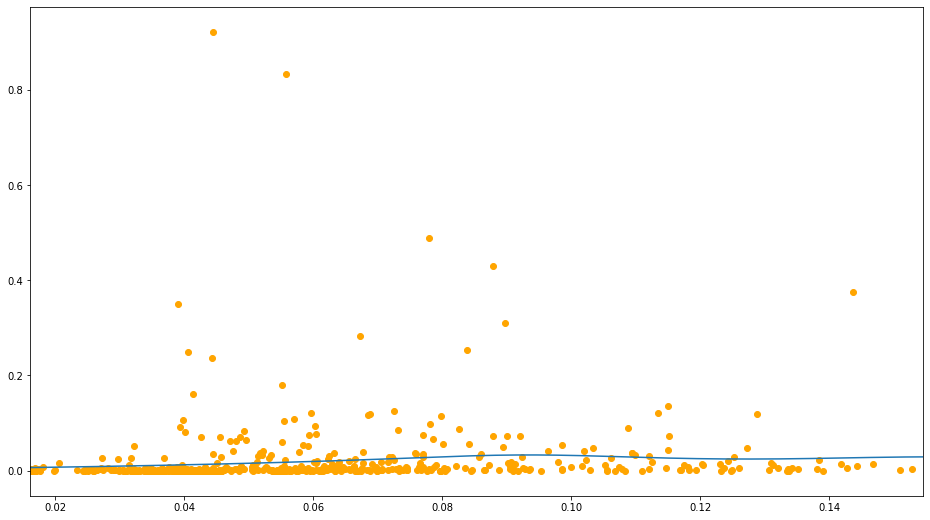

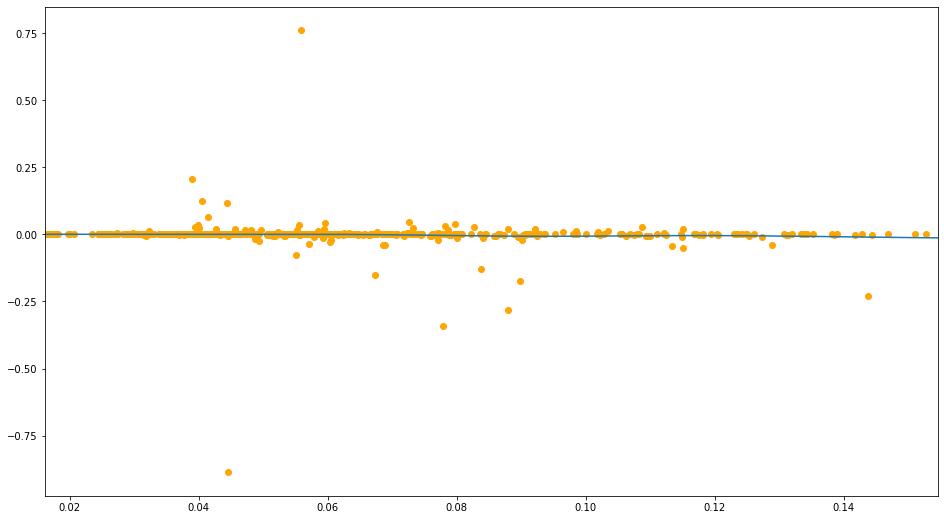

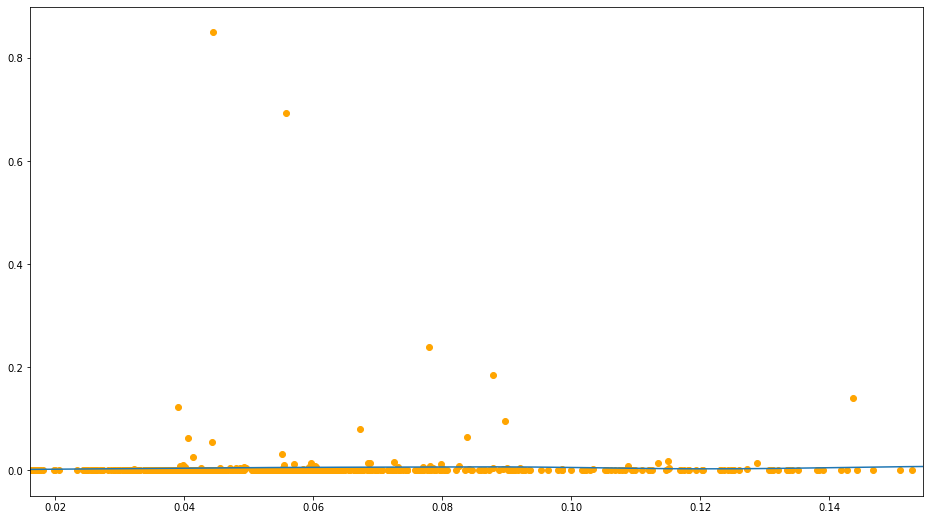

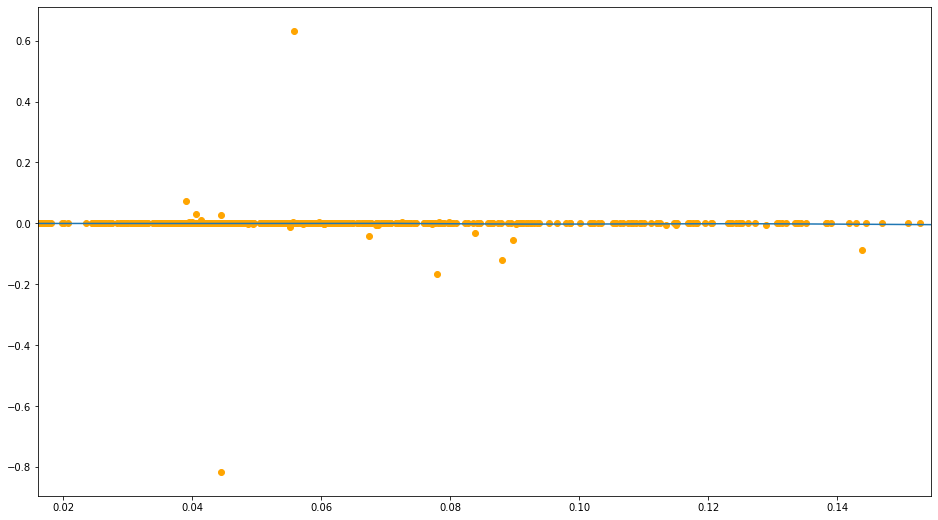

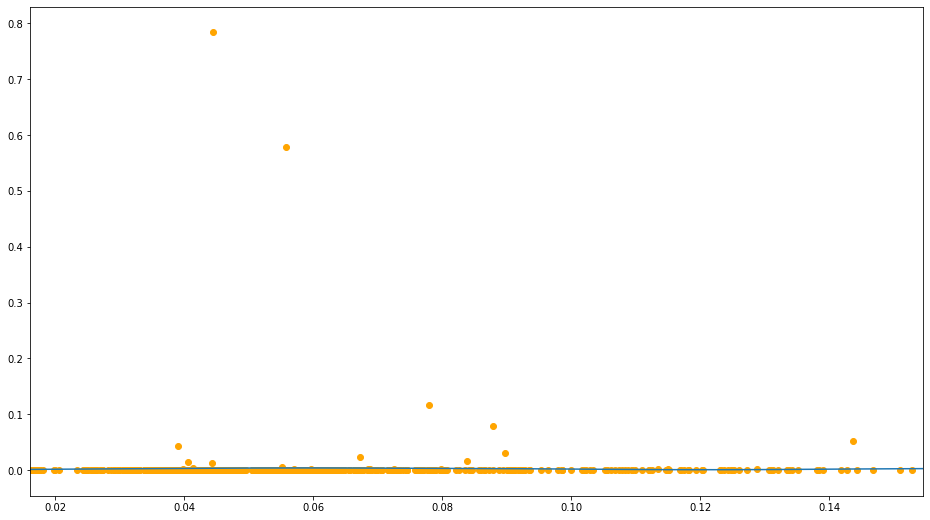

In [23]:
r_arr = np.linspace(np.quantile(data.r, 0.002),
                    np.quantile(data.r, 0.998), 500)
for j in [1,2,3,4,5,6]:


    dlogr = np.log((data.r/data.r.shift(1)))[1:]

    c_arr = np.array([1,1,1,1,1,1])*2
    c_dict = dict(zip([1,2,3,4,5,6], c_arr))

    result = []

    sigma = np.std(data.r)
    c = c_arr[j-1]
    h = sigma*len(data.r)**(-1/5)*c # 55 in Nonparametric Model of Term Structure Dynamics

    for r in r_arr:
        a = (data.r - r)[:-1]
        part1 = K(a/h)
        result.append(np.sum(part1*dlogr**j)/np.sum(part1))

    result = np.array(result)

    IM[j] = result
    plt.figure(figsize=(16,9))
    plt.scatter(data.r[:-1], dlogr**j, color='orange')
    plt.plot(r_arr, result)
    plt.xlim((min(r_arr), max(r_arr)))
    plt.savefig('IM%i.png'%j, transparent=True)

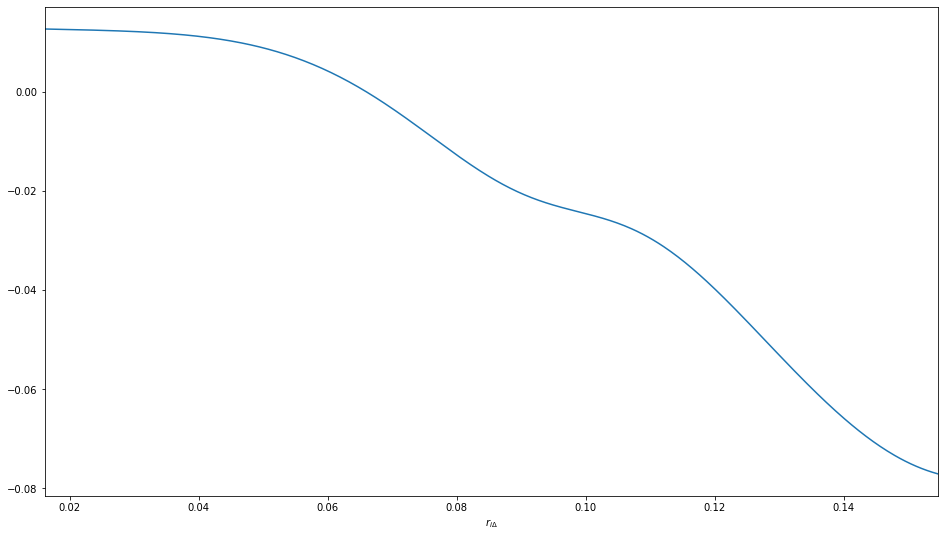

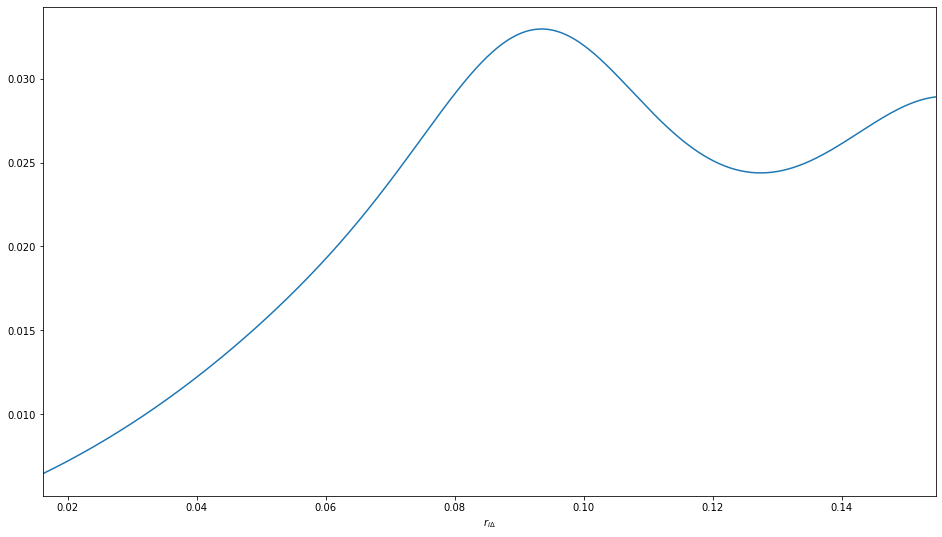

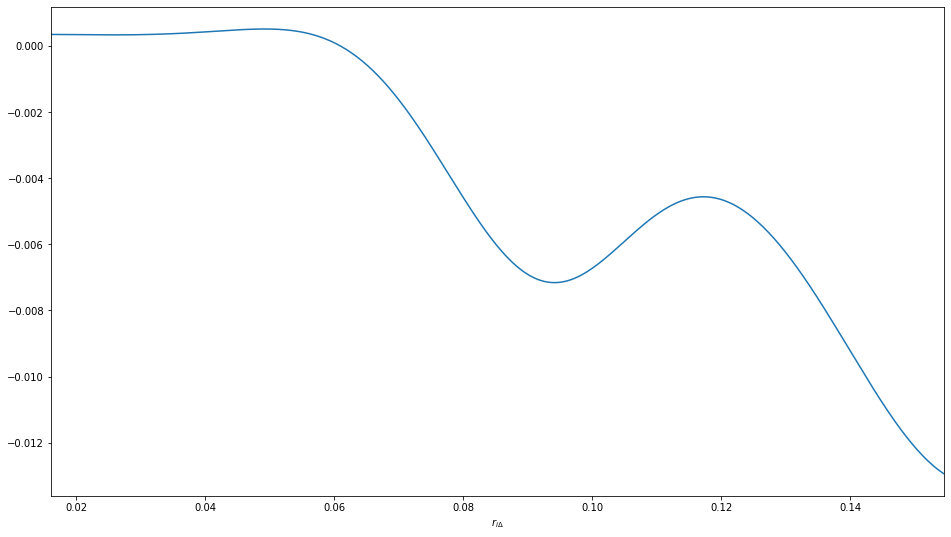

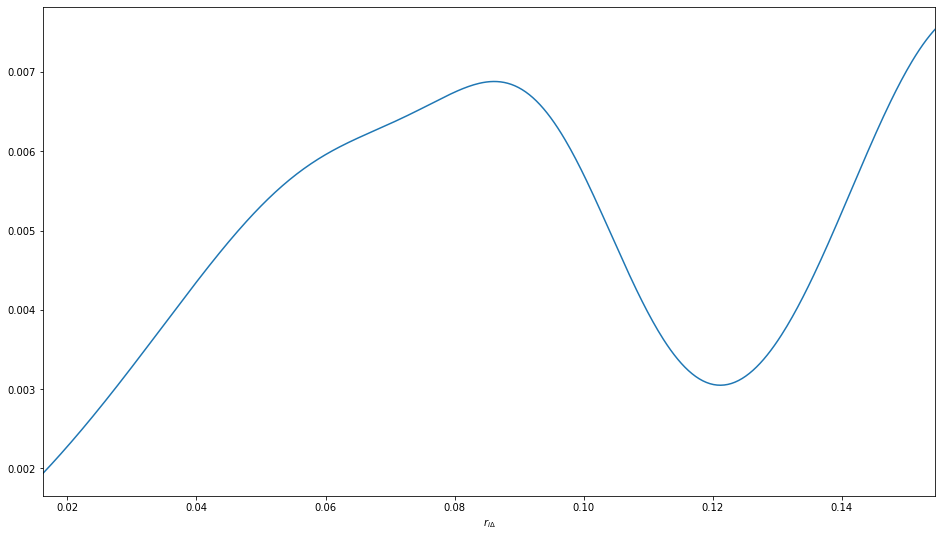

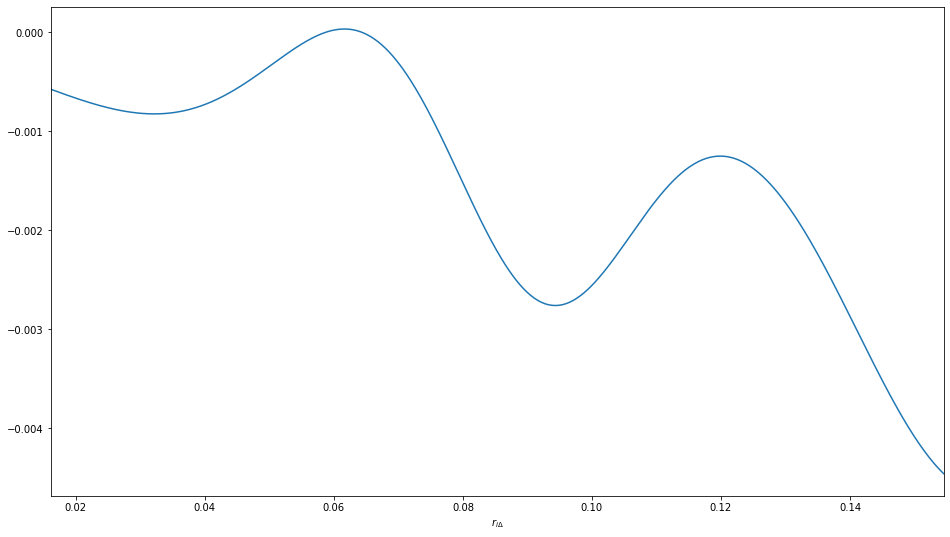

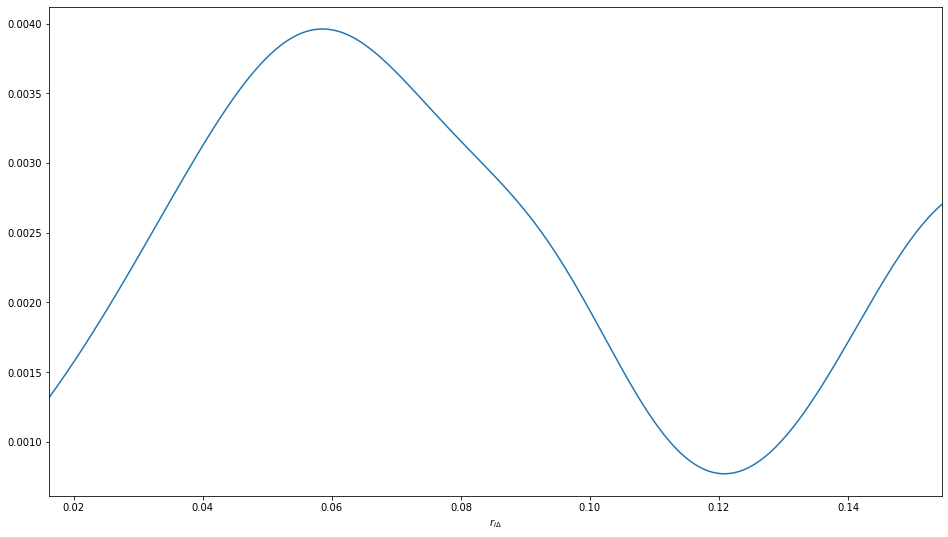

In [27]:
for j in [1,2,3,4,5,6]:
    plt.figure(figsize=(16,9))
    plt.plot(r_arr, IM[j])
    plt.xlabel(r'$r_{i\Delta}$')
    plt.xlim((min(r_arr), max(r_arr)))
    plt.savefig('IM%i_fitted.png'%j, transparent=True)